J'ai crée se notebook juste pour éviter les problèmes de merge avec git (les .ipynb merge tres mal :-/)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

In [3]:
# Load iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
#df['target'] = pd.Series(iris.target)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# Standardizse the features
df_norm = (df-df.mean())/df.std()
df_norm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


In [5]:
# Apply PCA
pca = decomposition.PCA(n_components=4)
principalDf = pd.DataFrame(data = pca.fit_transform(df_norm), columns=['Component #1', 'Component #2', 'Component #3', 'Component #4'])
principalDf

,Component #1,Component #2,Component #3,Component #4
0,-2.257141,0.478424,-0.127280,-0.024088
1,-2.074013,-0.671883,-0.233826,-0.102663
2,-2.356335,-0.340766,0.044054,-0.028282
3,-2.291707,-0.595400,0.090985,0.065735
4,-2.381863,0.644676,0.015686,0.035803
...,...,...,...,...
145,1.864258,0.385674,0.255418,-0.387957
146,1.559356,-0.893693,-0.026283,-0.219457
147,1.516091,0.268171,0.179577,-0.118773
148,1.368204,1.007878,0.930279,-0.026041


In [6]:
# Append the target Label columns
df = pd.concat([df, pd.Series(iris.target, name='target')], axis = 1)

finalDf = pd.concat([principalDf, pd.Series(iris.target, name='target')], axis = 1)
finalDf

,Component #1,Component #2,Component #3,Component #4,target
0,-2.257141,0.478424,-0.127280,-0.024088,0
1,-2.074013,-0.671883,-0.233826,-0.102663,0
2,-2.356335,-0.340766,0.044054,-0.028282,0
3,-2.291707,-0.595400,0.090985,0.065735,0
4,-2.381863,0.644676,0.015686,0.035803,0
...,...,...,...,...,...
145,1.864258,0.385674,0.255418,-0.387957,2
146,1.559356,-0.893693,-0.026283,-0.219457,2
147,1.516091,0.268171,0.179577,-0.118773,2
148,1.368204,1.007878,0.930279,-0.026041,2


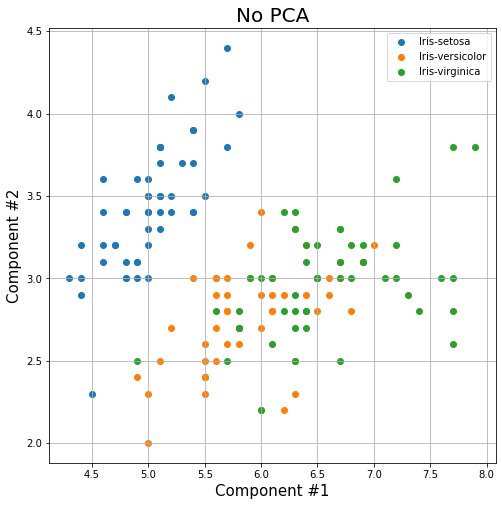

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for idt, _ in enumerate(targets):
    ax.scatter(df[df['target'] == idt].iloc[:,0], 
               df[df['target'] == idt].iloc[:,1])

ax.legend(targets)
ax.grid()
ax.set_xlabel('Component #1', fontsize = 15)
ax.set_ylabel('Component #2', fontsize = 15)
ax.set_title('No PCA', fontsize = 20)
plt.show()

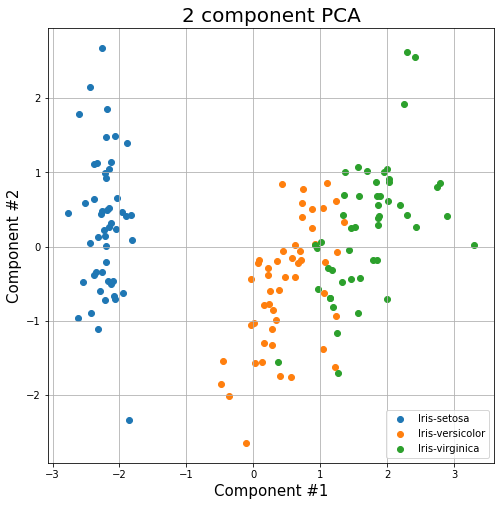

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

for idt, _ in enumerate(targets):
    ax.scatter(finalDf[finalDf['target'] == idt].iloc[:,0], 
               finalDf[finalDf['target'] == idt].iloc[:,1])

ax.legend(targets)
ax.grid()
ax.set_xlabel('Component #1', fontsize = 15)
ax.set_ylabel('Component #2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.show()

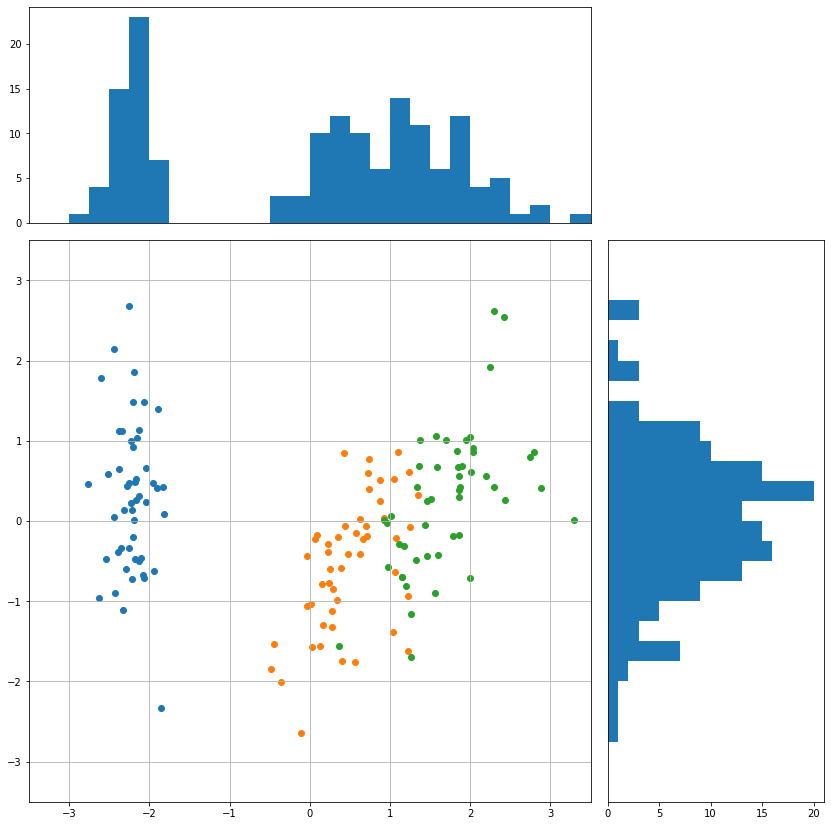

In [9]:
x = finalDf.iloc[:,0]
y = finalDf.iloc[:,1]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.25]
rect_histy = [left_h, bottom, 0.25, height]

# start with a rectangular Figure
plt.figure(1, figsize=(12, 12))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels


# the scatter plot:
for idt, _ in enumerate(targets):
    axScatter.scatter(finalDf[finalDf['target'] == idt].iloc[:,0], 
               finalDf[finalDf['target'] == idt].iloc[:,1])
    
axScatter.grid()

# now determine nice limits by hand:
binwidth = 0.25
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axHistx.set_xticks([])
axHisty.set_yticks([])

plt.show()

-----

In [316]:
# Synthetic data
N = 900
df = pd.DataFrame()

df['age'] = np.hstack([np.linspace(10, 50,N//2), np.linspace(50, 100,N//2)]) + np.random.normal(5, 7, N)
df['particle 1'] =  np.random.normal(10, 7,N)
df['particle 2'] =  np.hstack([np.random.normal(30, 7,N//2), np.random.normal(10, 7,N//2)])
df['death'] = df['particle 1']*100 + 10*df['age']
df['other'] = df['particle 2']*25


print('Synthetic data')
display(df)

# Standardizse the features
df_norm = (df-df.mean())/df.std()
print('Normalized data')
display(df_norm)


# Apply PCA
pca = decomposition.PCA(n_components=5)
PCA_df = pd.DataFrame(data = pca.fit_transform(df_norm), columns=['Component #1', 'Component #2', 'Component #3', 'Component #4','Component #5'])
print("After PCA")
print("Singular values:", pca.singular_values_)
display(PCA_df)


# Append the target Label columns
target = pd.Series(np.hstack([np.zeros(N//2),np.ones(N//2)]) , name='label')

df = pd.concat([df, target], axis = 1)
PCA_df = pd.concat([PCA_df, target], axis = 1)
PCA_df

Synthetic data


,age,particle 1,particle 2,death,other
0,23.309627,13.569304,29.775992,1590.026681,744.399790
1,20.403296,15.549548,31.756676,1758.987782,793.916911
2,21.049296,9.217793,26.051961,1132.272273,651.299026
3,16.402973,14.059786,29.569064,1570.008295,739.226598
4,9.105964,8.179918,28.512977,909.051484,712.824435
...,...,...,...,...,...
895,110.051817,17.437144,6.015139,2844.232586,150.378481
896,111.580192,15.456087,16.126246,2661.410631,403.156143
897,102.291425,3.948923,9.646846,1417.806528,241.171159
898,107.686166,12.707564,4.449960,2347.618101,111.248988


Normalized data


,age,particle 1,particle 2,death,other
0,-1.282357,0.476809,0.805545,-0.029546,0.805545
1,-1.390031,0.767653,0.965860,0.202718,0.965860
2,-1.366098,-0.162308,0.504126,-0.658803,0.504126
3,-1.538234,0.548848,0.788797,-0.057064,0.788797
4,-1.808573,-0.314743,0.703318,-0.965655,0.703318
...,...,...,...,...,...
895,1.931258,1.044889,-1.117635,1.694561,-1.117635
896,1.987881,0.753926,-0.299252,1.443243,-0.299252
897,1.643752,-0.936160,-0.823688,-0.266290,-0.823688
898,1.843616,0.350244,-1.244319,1.011885,-1.244319


After PCA
Singular values: [4.99615087e+01 4.03625012e+01 1.92280041e+01 6.48991220e-15
 4.74635580e-15]


,Component #1,Component #2,Component #3,Component #4,Component #5
0,1.461942,-0.868718,-0.527753,-1.894005e-15,-1.102778e-16
1,1.566884,-1.305124,-0.519489,4.588251e-15,5.083335e-16
2,1.487486,0.094224,-0.783186,-1.891901e-16,1.433780e-15
3,1.568614,-0.931764,-0.765718,9.544334e-17,-4.033678e-17
4,2.056820,0.236360,-1.002710,3.755168e-17,-3.040032e-17
...,...,...,...,...,...
895,-2.941159,-0.993793,0.743819,1.115028e-16,8.947930e-17
896,-1.932764,-0.997901,1.432043,-9.827883e-17,9.796833e-17
897,-1.487386,1.434919,0.857231,-1.161541e-17,-1.814484e-16
898,-2.693489,-0.038828,0.621104,-3.062227e-17,-1.873066e-16


,Component #1,Component #2,Component #3,Component #4,Component #5,label
0,1.461942,-0.868718,-0.527753,-1.894005e-15,-1.102778e-16,0.0
1,1.566884,-1.305124,-0.519489,4.588251e-15,5.083335e-16,0.0
2,1.487486,0.094224,-0.783186,-1.891901e-16,1.433780e-15,0.0
3,1.568614,-0.931764,-0.765718,9.544334e-17,-4.033678e-17,0.0
4,2.056820,0.236360,-1.002710,3.755168e-17,-3.040032e-17,0.0
...,...,...,...,...,...,...
895,-2.941159,-0.993793,0.743819,1.115028e-16,8.947930e-17,1.0
896,-1.932764,-0.997901,1.432043,-9.827883e-17,9.796833e-17,1.0
897,-1.487386,1.434919,0.857231,-1.161541e-17,-1.814484e-16,1.0
898,-2.693489,-0.038828,0.621104,-3.062227e-17,-1.873066e-16,1.0


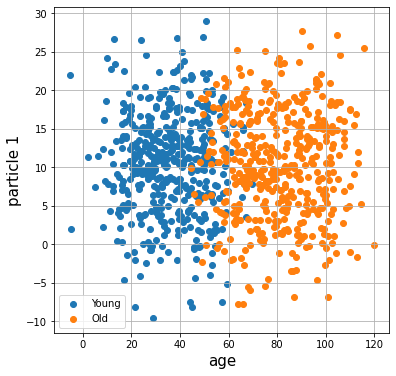

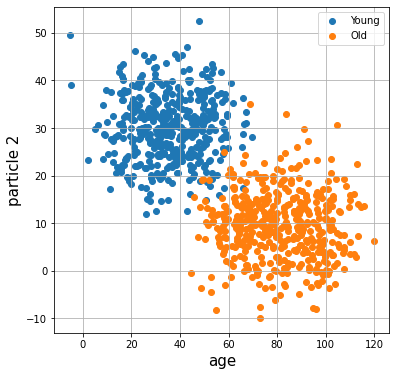

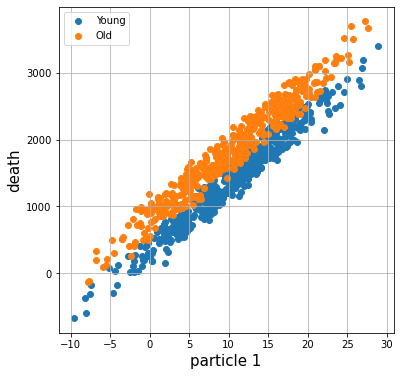

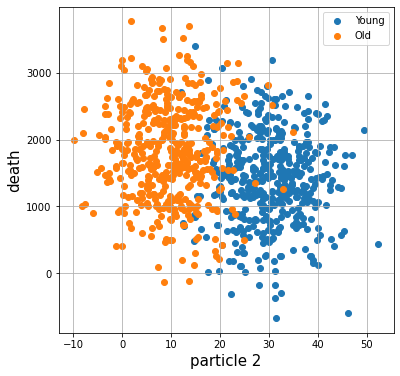

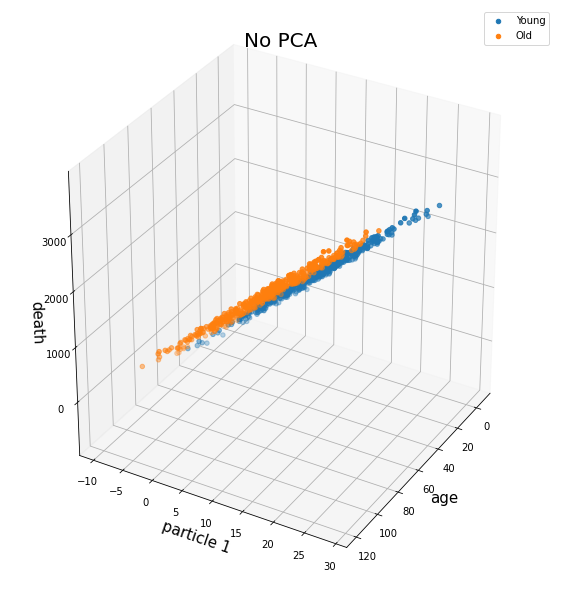

In [317]:
fig = plt.figure(figsize = (6,6), frameon = False)
ax = fig.add_subplot(1,1,1) 
targets = ['Young', 'Old']

for idt, _ in enumerate(targets):
    ax.scatter(df[df['label'] == idt].iloc[:,0], 
               df[df['label'] == idt].iloc[:,1])

ax.legend(targets)
ax.grid()
ax.set_xlabel(df.columns[0], fontsize = 15)
ax.set_ylabel(df.columns[1], fontsize = 15)
plt.savefig('./figures/synthetic_01.png')
plt.show()


fig = plt.figure(figsize = (6,6), frameon = False)
ax = fig.add_subplot(1,1,1) 

for idt, _ in enumerate(targets):
    ax.scatter(df[df['label'] == idt].iloc[:,0], 
               df[df['label'] == idt].iloc[:,2])

ax.legend(targets)
ax.grid()
ax.set_xlabel(df.columns[0], fontsize = 15)
ax.set_ylabel(df.columns[2], fontsize = 15)
plt.savefig('./figures/synthetic_02.png')
plt.show()

fig = plt.figure(figsize = (6,6), frameon = False)
ax = fig.add_subplot(1,1,1) 

for idt, _ in enumerate(targets):
    ax.scatter(df[df['label'] == idt].iloc[:,1], 
               df[df['label'] == idt].iloc[:,3])

ax.legend(targets)
ax.grid()
ax.set_xlabel(df.columns[1], fontsize = 15)
ax.set_ylabel(df.columns[3], fontsize = 15)
plt.savefig('./figures/synthetic_13.png')
plt.show()


fig = plt.figure(figsize = (6,6), frameon = False)
ax = fig.add_subplot(1,1,1) 

for idt, _ in enumerate(targets):
    ax.scatter(df[df['label'] == idt].iloc[:,2], 
               df[df['label'] == idt].iloc[:,3])

ax.legend(targets)
ax.grid()
ax.set_xlabel(df.columns[2], fontsize = 15)
ax.set_ylabel(df.columns[3], fontsize = 15)
plt.savefig('./figures/synthetic_23.png')
plt.show()

fig = plt.figure(figsize = (8,8))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=30, azim=30)

for idt, _ in enumerate(targets):
    ax.scatter(df[df['label'] == idt].iloc[:,0], 
               df[df['label'] == idt].iloc[:,1],
               df[df['label'] == idt].iloc[:,3])

ax.legend(targets)
ax.grid()
ax.set_xlabel(df.columns[0], fontsize = 15)
ax.set_ylabel(df.columns[1], fontsize = 15)
ax.set_zlabel(df.columns[3], fontsize = 15)
ax.set_title('No PCA', fontsize = 20)
plt.show()

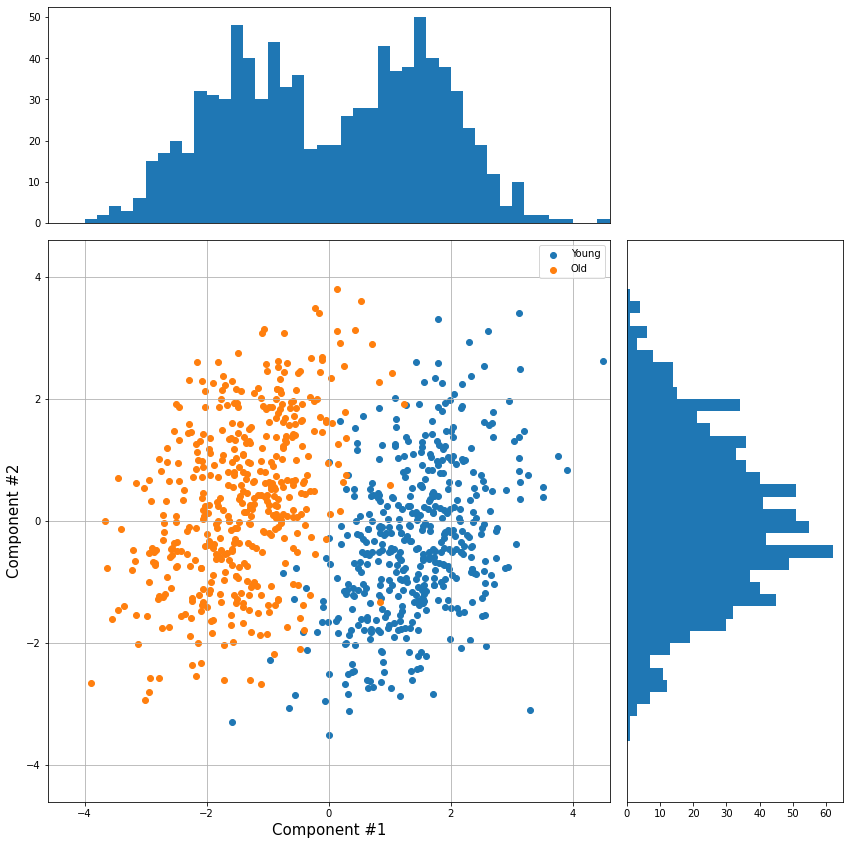

In [319]:
x = PCA_df.iloc[:,0]
y = PCA_df.iloc[:,1]

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.25]
rect_histy = [left_h, bottom, 0.25, height]

# start with a rectangular Figure
plt.figure(1, figsize=(12, 12))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels


# the scatter plot:
for idt, _ in enumerate(targets):
    axScatter.scatter(PCA_df[PCA_df['label'] == idt].iloc[:,0], 
               PCA_df[PCA_df['label'] == idt].iloc[:,1])
    

# now determine nice limits by hand:
binwidth = 0.2
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

axHistx.set_xticks([])
axHisty.set_yticks([])

axScatter.legend(targets)
axScatter.grid()
axScatter.set_xlabel('Component #1', fontsize = 15)
axScatter.set_ylabel('Component #2', fontsize = 15)
plt.savefig('./figures/synthetic_PCA.png')
plt.show()

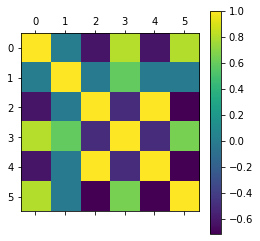

In [263]:
corrMatrix = df.iloc[:,:].corr()
cax = plt.matshow(corrMatrix)
plt.colorbar(cax)
plt.show()

-----
**Assignment #1: Report on the test of the tool on simulated and real dataThe  report  presents  the  assigned  tool  and  its  advantages,  disadvantages,  and  limitations,  bothin  a  theoretical  as  well  as  numerical  way  with  examples  using  synthetic  data  (to  show  specificcharacteristics) and real one.**

In this part, we will show the advantages and disadvantages of the PCA using synthetic data. We then present the limitations of this method both in theoritical and numerical way.



\subsection{Synthetic data}

First of all, we need to construct synthetic data, this is done by creating a dataframe of several random features, where some features are composition of different other features, hence we have some correlated features as well as uncorrelated features.

Let $c_m$ be one of our $M=1000$ data vector and suppose we have 5 features: 

$$c_m = \left( c_{m_1}, \dots, c_{m_5}\right)$$ <!--- ^{\intercal} --->

With:
<!--\begin{itemize}-->
<!--\end{itemize}-->
- $c_{m_1}$: age of the population, divided in two intervals $[10:50]$ \& $[50:100]$ of size $M//2$ respectively
- $c_{m_2}$: particle 1 absorption/accumulation, with Gaussian distribution: $\mathcal{N}(\mu_1, \sigma^2)$
- $c_{m_3}$: particle 2 absorption/accumulation, divided in two intervals with Gaussian distribution: $\mathcal{N}(\mu_2, \sigma^2)$ \& $\mathcal{N}(\mu_1, \sigma^2)$
- $c_{m_4}$: death number/rate, computed as $c_{m_4} = \alpha\ c_{m_2} + \beta\ c_{m_1}$
- $c_{m_5}$: misc feature (just for having one more), computed as $c_{m_5} = \gamma\ c_{m_3}$

The parameters $\mu_i, \sigma_i, \alpha, \beta$ and $\gamma$ does not hold any physical meaning for our example here.

The table~(\ref{tab:data_ex}) is 3 rows of this data

\begin{table}[ht!]
\begin{tabular}{rrrrrr}
\toprule
       age &  particle 1 &  particle 2 &        death &       other &  label \\
\midrule
 58.222525 &    5.456391 &   18.980316 &  1127.864341 &  474.507908 &    1.0 \\
 41.266067 &   12.901608 &   27.742473 &  1702.821484 &  693.561825 &    0.0 \\
 20.797626 &    6.475633 &   36.407300 &   855.539583 &  910.182491 &    0.0 \\
\bottomrule
\end{tabular}
\label{tab:data_ex}
\caption{TODO: example of 3 rows blabla}
\end{table}


We also show in the figure~(\ref{fig:ex_plot}) scatter plots of the data with different features as axis.

We obviously see that the 'death' is correlated with the 'particle 1'. It is important to note that the points are labelised for ease of observation but with real data, we are not able to see the clusters formation on these plots. This is one reason of using PCA, it helps us choose the best axis to project the meaninful data onto it and visualize/retrieve the main feature of the dataset.

TODO subifigure ici